In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NGSIM Trajectories.csv')

In [3]:
df = df[df["Direction"] != 4]

In [4]:
df = df.drop(['Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'Frame_ID', 'Tot_Frames', 'Veh_Len', 'Veh_Wid', 'Section', 'Direction', 'Veh_Class', 'Vehicle_Acc', 'Preceding_Veh', 'Following_Veh', 'Spacing', 'Headway'], axis=1)

In [5]:
idx = df.groupby("Vehicle_ID")['Epoch_ms'].transform(min) == df['Epoch_ms']
df_min_match = df[idx].reset_index(drop=True)
df_min_match = df_min_match.sort_values(by='Epoch_ms')

idx = df.groupby("Vehicle_ID")['Epoch_ms'].transform(max) == df['Epoch_ms']
df_max_match = df[idx].reset_index(drop=True)
df_max_match = df_max_match.sort_values(by='Epoch_ms')

In [6]:
df_final = df_min_match.copy()
df_final["Movement_Last"] = df_max_match["Movement"]
df_final["Intersection_Last"] = df_max_match["Intersection"]
df_final["Interarrival"] = df_min_match["Epoch_ms"].diff()
df_final["Leave_Time"] = df_max_match["Epoch_ms"]

In [7]:
df_final.head()

,Vehicle_ID,Epoch_ms,Veh_Velocity,Lane_ID,Org_Zone,Dest_Zone,Intersection,Movement,Movement_Last,Intersection_Last,Interarrival,Leave_Time
0,2,1163033200,16.59,0,102,214,1,3,1,5,NaN,1163201100
1,13,1163034600,20.01,0,102,203,1,3,1,0,1400.0,1163092200
2,15,1163034800,17.29,1,101,214,0,1,1,5,200.0,1163206000
3,17,1163036300,25.79,1,101,214,0,1,1,5,1500.0,1163207900
4,21,1163039100,23.83,2,101,202,0,1,1,0,2800.0,1163059900


In [17]:
# map origin zone to a specific entrance intersection
ent_0 = {101: 0}
ent_1 = dict.fromkeys([102, 123], 1)
ent_2 = dict.fromkeys([103, 122], 2)
ent_3 = dict.fromkeys([105, 106, 121], 3)
ent_4 = dict.fromkeys([108, 110, 111, 112, 119, 120], 4)
ent_5 = dict.fromkeys([113, 115, 116, 117, 118], 5)
intersection_entrances = {**ent_0, **ent_1, **ent_2, **ent_3, **ent_4, **ent_5}

df_final['Intersection'] = df_final['Org_Zone'].map(intersection_entrances)

# map destination zone to a specific exit intersection
exit_1 = dict.fromkeys([202, 223], 1)
exit_2 = dict.fromkeys([203, 222], 2)
exit_3 = dict.fromkeys([204, 205, 206, 221], 3)
exit_4 = dict.fromkeys([207, 208, 209, 210, 211, 220, 212], 4)
exit_5 = dict.fromkeys([213, 215, 216, 217, 218], 5)
exit_6 = {214: 6}
intersection_exits = {**exit_1, **exit_2, **exit_3, **exit_4, **exit_5, **exit_6}

df_final['Intersection_Last'] = df_final['Dest_Zone'].map(intersection_exits)

df_final.head()

,Vehicle_ID,Epoch_ms,Veh_Velocity,Lane_ID,Org_Zone,Dest_Zone,Intersection,Movement,Movement_Last,Intersection_Last,Interarrival,Leave_Time
0,2,1163033200,16.59,0,102,214,1,3,1,6,NaN,1163201100
1,13,1163034600,20.01,0,102,203,1,3,1,2,1400.0,1163092200
2,15,1163034800,17.29,1,101,214,0,1,1,6,200.0,1163206000
3,17,1163036300,25.79,1,101,214,0,1,1,6,1500.0,1163207900
4,21,1163039100,23.83,2,101,202,0,1,1,1,2800.0,1163059900


In [18]:
df_final.to_csv("Processed_vehicle_data.csv", index=False)

l = len(df_final.index)
b = round(math.sqrt(l))

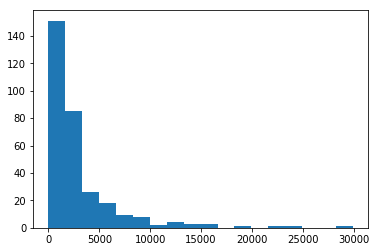

In [19]:
n, bins, patches = plt.hist(df_final["Interarrival"], b)

0    135
1     62
2     10
3      6
4     30
5     71
Name: Intersection, dtype: int64


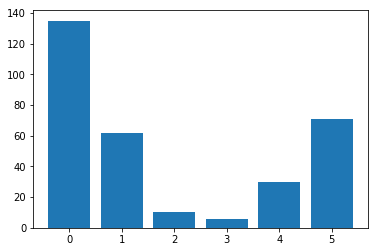

In [20]:
x = df_final["Intersection"].value_counts()
x = x.sort_index()
a = plt.bar(list(x.index), list(x.values))

print(x)

1     58
2     16
3      9
4      9
5     28
6    194
Name: Intersection_Last, dtype: int64


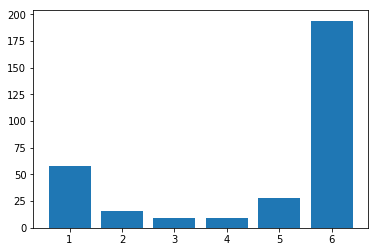

In [22]:
x = df_final["Intersection_Last"].value_counts()
x = x.sort_index()
print(x)
a = plt.bar(list(x.index), list(x.values))

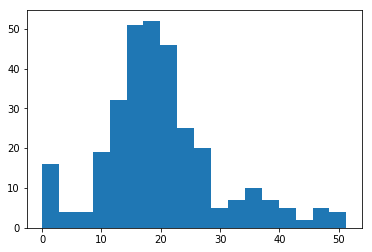

In [15]:
n, bins, patches = plt.hist(df_final["Veh_Velocity"], b)

([<matplotlib.axis.XTick at 0x219bee846d8>,
 <a list of 3 Text xticklabel objects>)

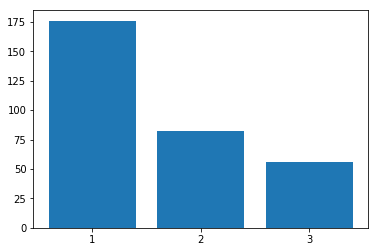

In [16]:
x = df_final["Movement"].value_counts()
x = x.sort_index()
a = plt.bar(list(x.index), list(x.values))
plt.xticks((1,2,3))